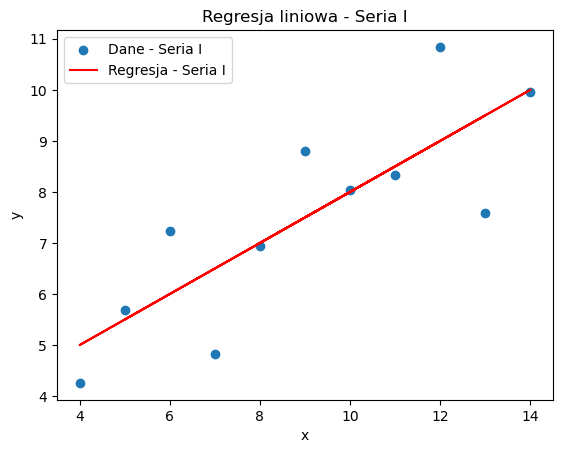

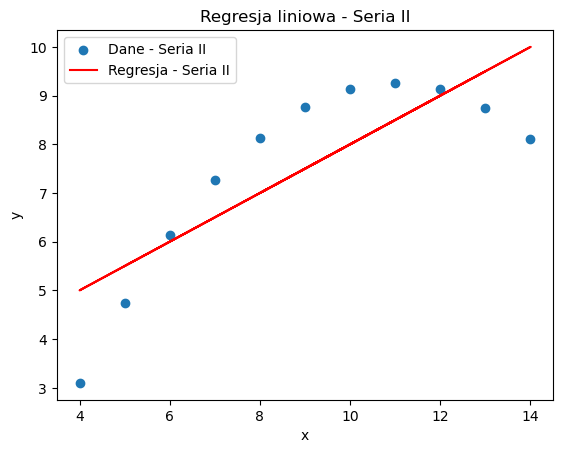

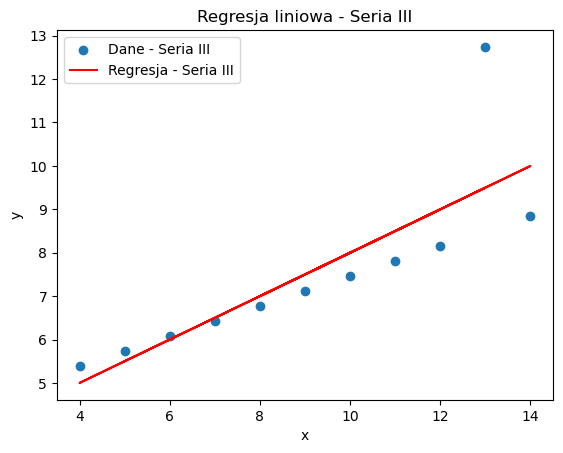

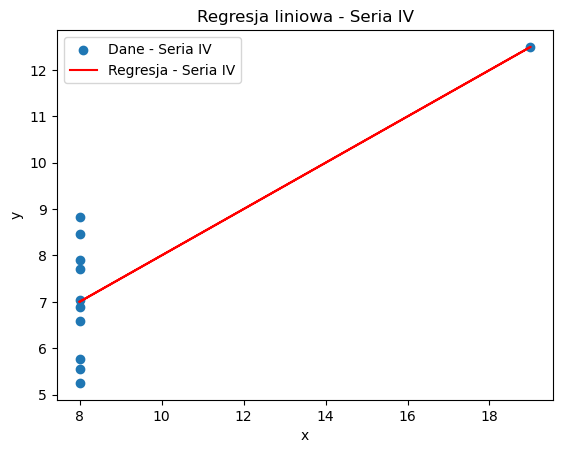

Seria I:
Średnia x: 9.0, Średnia y: 7.500909090909093
Wariancja x: 11.0, Wariancja y: 4.127269090909091
Korelacja Pearsona: 0.81642051634484
Współczynniki regresji: beta1=0.5000909090909096, beta0=3.000090909090908

Seria II:
Średnia x: 9.0, Średnia y: 7.50090909090909
Wariancja x: 11.0, Wariancja y: 4.127629090909091
Korelacja Pearsona: 0.8162365060002428
Współczynniki regresji: beta1=0.5000000000000001, beta0=3.0009090909090905

Seria III:
Średnia x: 9.0, Średnia y: 7.5
Wariancja x: 11.0, Wariancja y: 4.12262
Korelacja Pearsona: 0.8162867394895984
Współczynniki regresji: beta1=0.499727272727273, beta0=3.0024545454545435

Seria IV:
Średnia x: 9.0, Średnia y: 7.500909090909091
Wariancja x: 11.0, Wariancja y: 4.12324909090909
Korelacja Pearsona: 0.8165214368885028
Współczynniki regresji: beta1=0.4999090909090908, beta0=3.001727272727274



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dane kwartetu Anscombe'a
data = {
    'I': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
          'y': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]},
    'II': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
           'y': [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]},
    'III': {'x': [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
            'y': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]},
    'IV': {'x': [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8],
           'y': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]}
}

# Tworzenie osobnych DataFrame dla każdej serii danych
df_I = pd.DataFrame(data['I'])
df_II = pd.DataFrame(data['II'])
df_III = pd.DataFrame(data['III'])
df_IV = pd.DataFrame(data['IV'])


dfs = {'I': df_I, 'II': df_II, 'III': df_III, 'IV': df_IV}

# Słowniki do zapisywania wyników
results = {
    'mean_x': {}, 'mean_y': {}, 'var_x': {}, 'var_y': {}, 'corr': {}, 'beta1': {}, 'beta0': {}
}

# Obliczanie statystyk dla każdej serii danych
for series, df in dfs.items():
    x = df['x']
    y = df['y']
    
    # Średnie, wariancje i korelacja Pearsona
    results['mean_x'][series] = np.mean(x)
    results['mean_y'][series] = np.mean(y)
    results['var_x'][series] = np.var(x, ddof=1)  # ddof=1 daje wariancję z próby
    results['var_y'][series] = np.var(y, ddof=1)
    results['corr'][series] = np.corrcoef(x, y)[0, 1]
    
    # Regresja liniowa MNK (beta1 - nachylenie, beta0 - punkt przecięcia)
    beta1, beta0 = np.polyfit(x, y, 1)
    results['beta1'][series] = beta1
    results['beta0'][series] = beta0
    
    # Rysowanie wykresu dla serii
    plt.scatter(x, y, label=f"Dane - Seria {series}")
    plt.plot(x, beta1 * np.array(x) + beta0, color='red', label=f"Regresja - Seria {series}")
    plt.title(f"Regresja liniowa - Seria {series}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Wyświetlanie wyników
for series in dfs.keys():
    print(f"Seria {series}:")
    print(f"Średnia x: {results['mean_x'][series]}, Średnia y: {results['mean_y'][series]}")
    print(f"Wariancja x: {results['var_x'][series]}, Wariancja y: {results['var_y'][series]}")
    print(f"Korelacja Pearsona: {results['corr'][series]}")
    print(f"Współczynniki regresji: beta1={results['beta1'][series]}, beta0={results['beta0'][series]}\n")


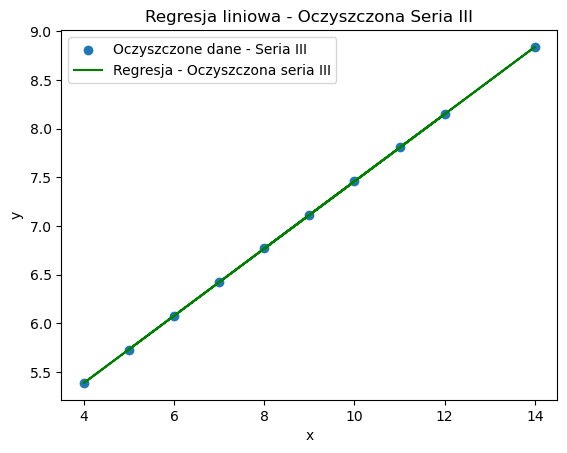

Wyniki dla oczyszczonej serii III:
Nowe współczynniki regresji: beta1=0.34538961038961036, beta0=4.0056493506493505
Współczynnik determinacji R2 po oczyszczeniu: 0.9999931075815326


In [4]:
import xml.etree.ElementTree as ET

y_iii = df_III['y']
q1 = np.percentile(y_iii, 25)
q3 = np.percentile(y_iii, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtracja wartości odstających
cleaned_df_III = df_III[(y_iii >= lower_bound) & (y_iii <= upper_bound)]
cleaned_x_iii = cleaned_df_III['x']
cleaned_y_iii = cleaned_df_III['y']

# Obliczanie współczynników regresji po oczyszczeniu
beta1_cleaned, beta0_cleaned = np.polyfit(cleaned_x_iii, cleaned_y_iii, 1)
r2_cleaned = np.corrcoef(cleaned_x_iii, cleaned_y_iii)[0, 1] ** 2

# Wyświetlenie wykresu dla oczyszczonej serii III
plt.scatter(cleaned_x_iii, cleaned_y_iii, label="Oczyszczone dane - Seria III")
plt.plot(cleaned_x_iii, beta1_cleaned * cleaned_x_iii + beta0_cleaned, color='green', label="Regresja - Oczyszczona seria III")
plt.title("Regresja liniowa - Oczyszczona Seria III")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Wyniki po oczyszczeniu
print("Wyniki dla oczyszczonej serii III:")
print(f"Nowe współczynniki regresji: beta1={beta1_cleaned}, beta0={beta0_cleaned}")
print(f"Współczynnik determinacji R2 po oczyszczeniu: {r2_cleaned}")

# Zapis danych w formatach CSV, JSON i XML

# Łączenie serii w jeden DataFrame dla zapisu
combined_data = {
    'x_I': df_I['x'], 'y_I': df_I['y'],
    'x_II': df_II['x'], 'y_II': df_II['y'],
    'x_III': df_III['x'], 'y_III': df_III['y'],
    'x_IV': df_IV['x'], 'y_IV': df_IV['y']
}
combined_df = pd.DataFrame(combined_data)

# Zapis do CSV
combined_df.to_csv('anscombe.csv', index=False)

# Zapis do JSON
combined_df.to_json('anscombe.json', orient="records")

# Zapis do XML
root = ET.Element("root")
for series, df in zip(['I', 'II', 'III', 'IV'], [df_I, df_II, df_III, df_IV]):
    serie_element = ET.SubElement(root, "series", name=series)
    for x_val, y_val in zip(df['x'], df['y']):
        point = ET.SubElement(serie_element, "point")
        ET.SubElement(point, "x").text = str(x_val)
        ET.SubElement(point, "y").text = str(y_val)

tree = ET.ElementTree(root)
tree.write("anscombe.xml")